In [2]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib as plt

import shapely

In [3]:
dir_path = "train/labels/"
training_labels = os.listdir(dir_path)
sample = training_labels[0:10]

In [21]:
import cv2
from PIL import Image
from IPython.display import display

from IPython.display import Image as iimage


def see_photo(name): 

    p = 'train/images/'
    display(iimage(filename=p + name.split(".json")[0] + ".png"))

def view_seg(name): 

    alpha = 0.3 # that's your transparency factor
    path_image = 'train/images/' + name.split(".json")[0] + ".png"
    path_json = 'train/labels/' + name

    d = pd.read_json(path_json)
    xy = d['features']['xy']
    
    if xy != None and len(xy) > 0: 
        p = d['features']['xy'][0]['wkt']
        polygon = shapely.wkt.loads(p)
        int_coords = lambda x: np.array(x).round().astype(np.int32)
        exterior = [int_coords(polygon.exterior.coords)]

        image = cv2.imread(path_image)
        overlay = image.copy()
        cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
        # cv2.imshow("Polygon", image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        display(Image.fromarray(image))
    else: 
        see_photo(name)
        

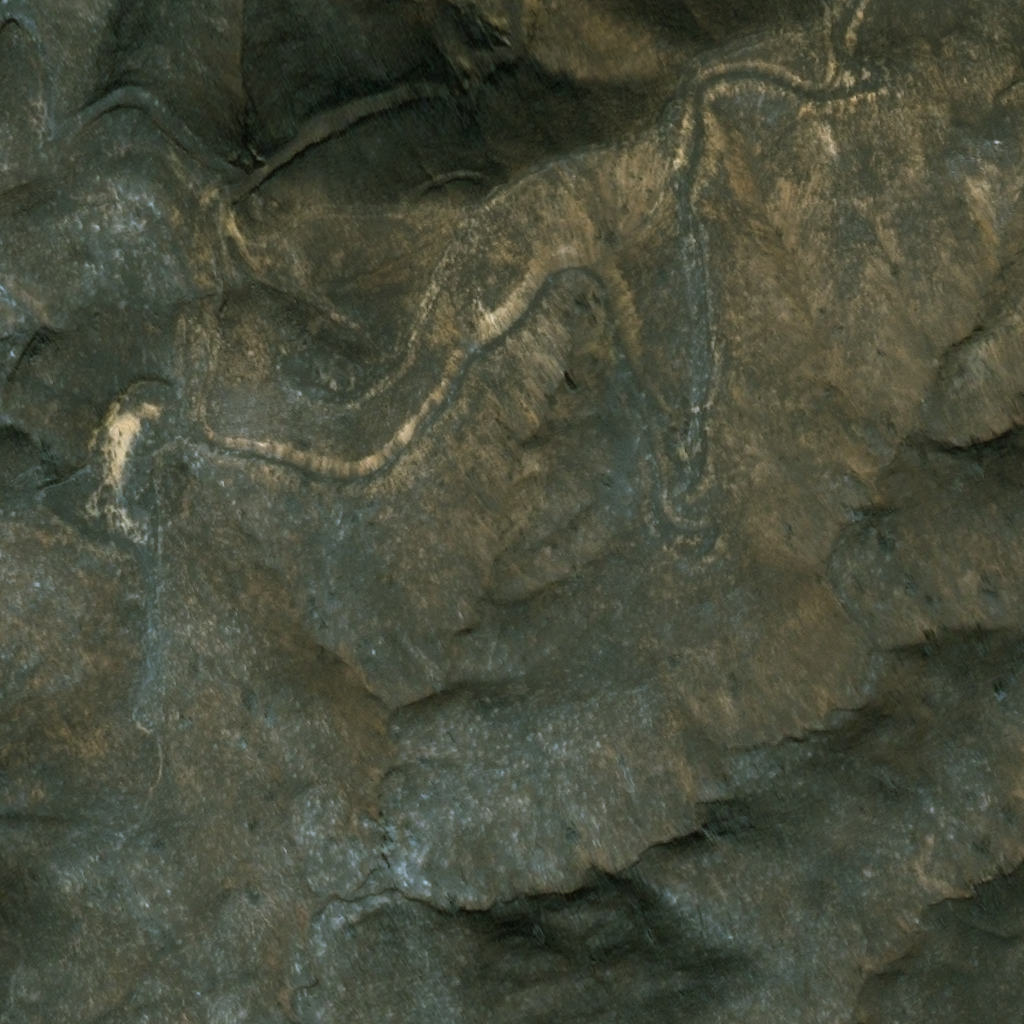

In [23]:
view_seg(sample[0])